**EXERCISE 4: OBJECT DETECTION AND RECOGNITION**

# **Exercise 1: HOG(Histogram of Oriented Gradients) Object Detection**

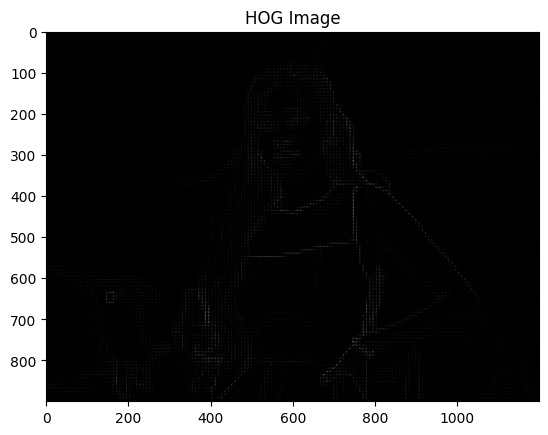

In [2]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt


# Load an image

image = cv2.imread('/content/rose.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply HOG descriptor

features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)


# Display the HOG image
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.show()



# **Exercise 2: YOLO (You Only Look Once) Object Detection**

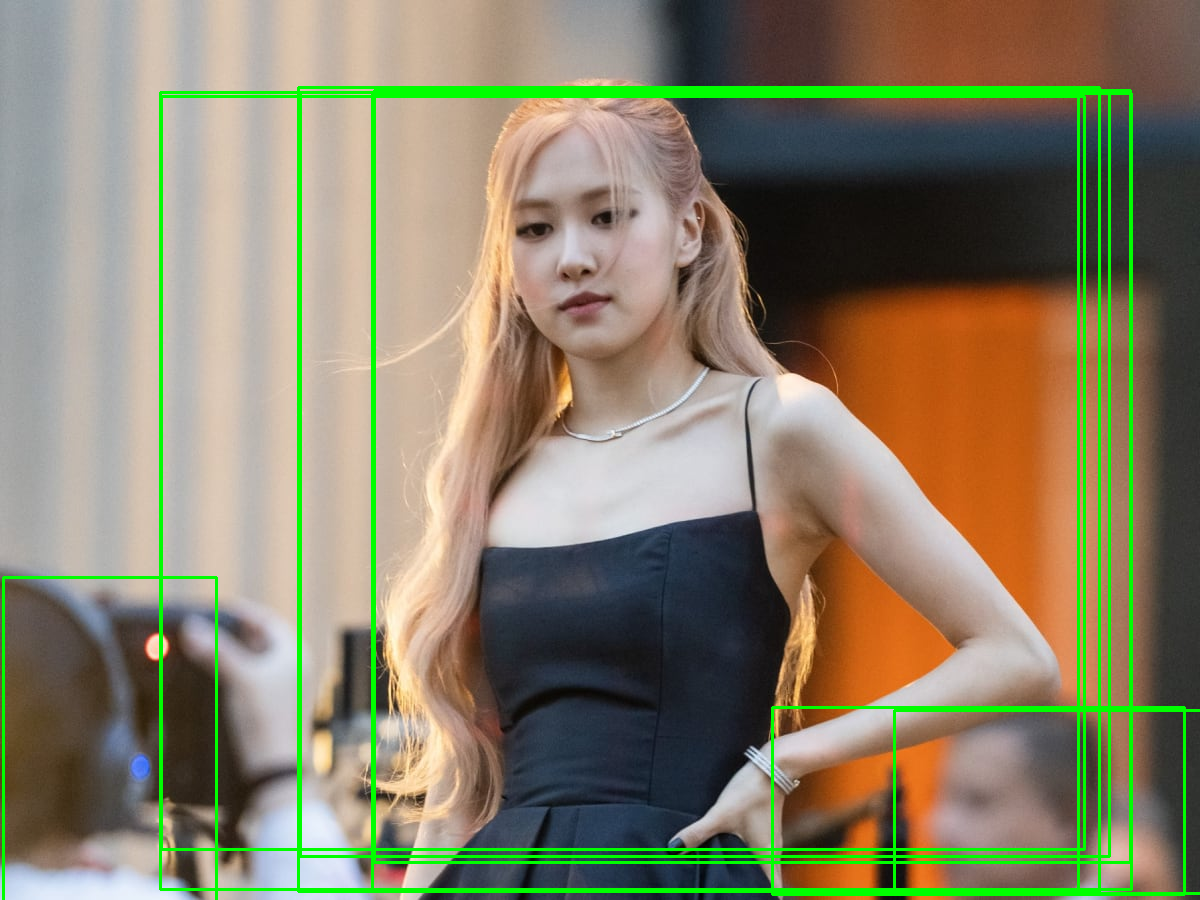

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


net = cv2.dnn.readNet('/content/yolov3.weights', '/content/yolov3.cfg')
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

img = cv2.imread('/content/rose.jpg')
height, width, channels = img.shape

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Process detections

for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      # Draw bounding box
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow**

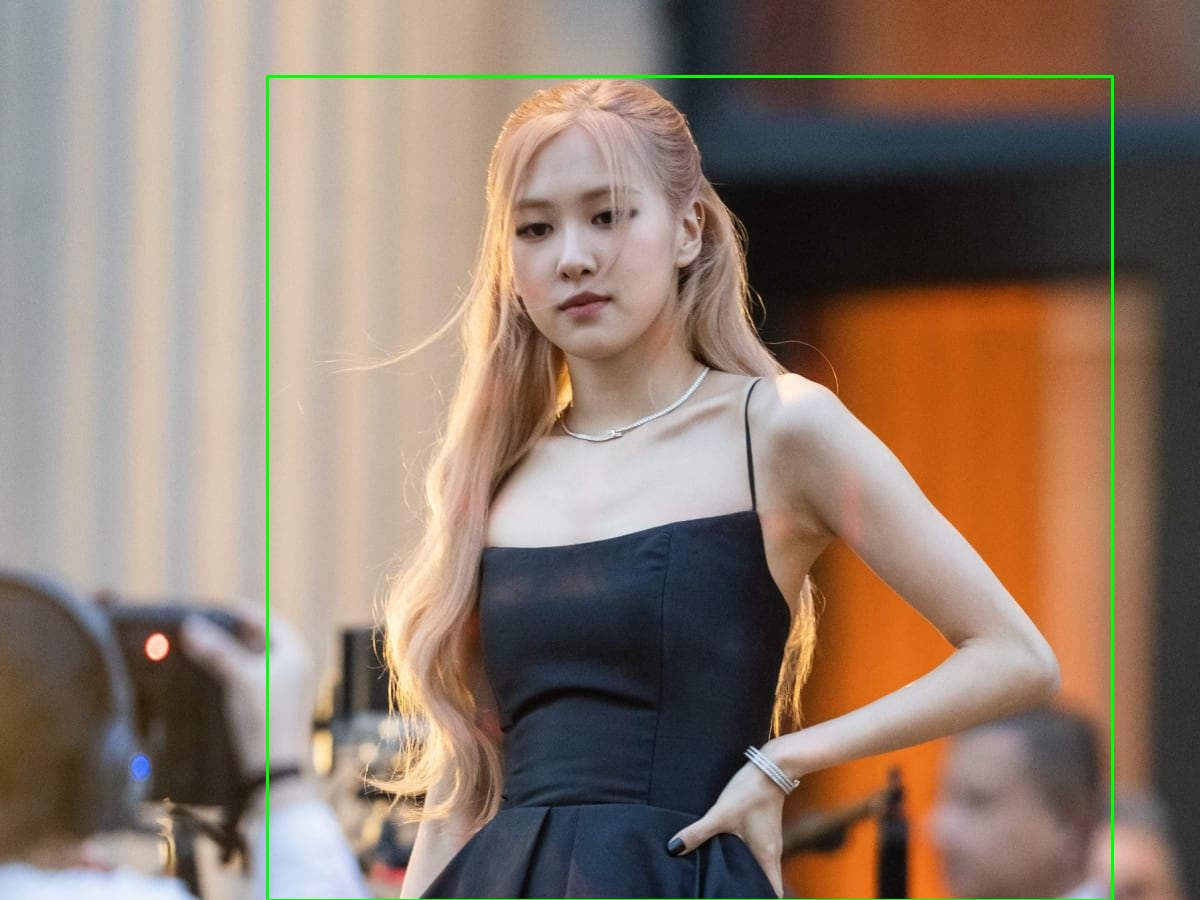

In [13]:
import tensorflow as tf
import cv2

# load pre-trained SSD model
model = tf.saved_model.load('/content/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model')



# load image
image_path = '/content/rose.jpg'
image = cv2.imread(image_path)
input_tensor = tf.convert_to_tensor(image)
input_tensor = input_tensor[tf.newaxis, ...]

# run inference
detections = model(input_tensor)

# Visualize the bounding boxed

for i in range(int(detections.pop('num_detections'))):
  if detections['detection_scores'][0][i] > 0.5:
    # Get bounding box coordinates
    ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
    (left, right, top, bottom) = (xmin * image.shape[1], xmax * image.shape[1], ymin * image.shape[0], ymax * image.shape[0])

    # Draw bounding box
    cv2.rectangle(image, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

# Display the image
cv2_imshow(image)

# **Exercise 4: Traditional vs. Deep Learning Object Detection Comparison**

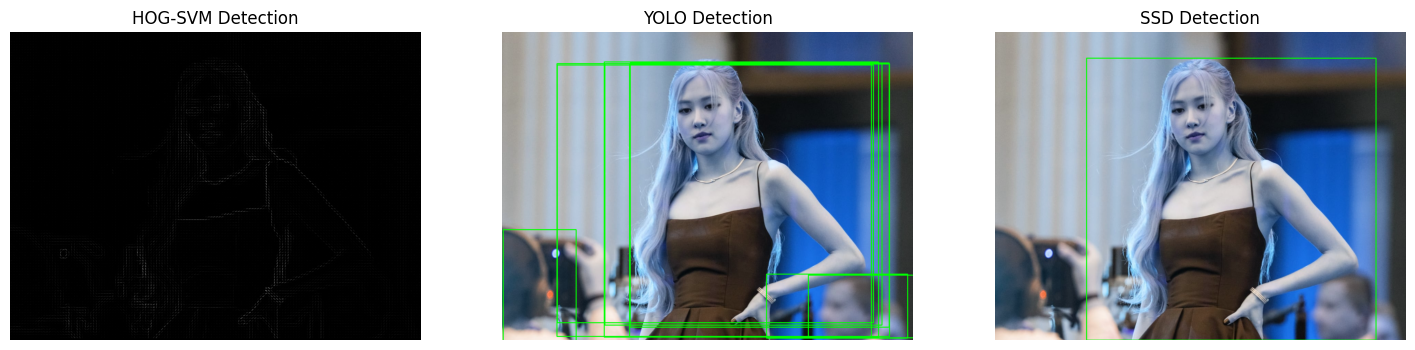

In [16]:
# --- Plotting the comparison ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(hog_image, cmap='gray')
axs[0].set_title('HOG-SVM Detection')
axs[1].imshow(img)
axs[1].set_title('YOLO Detection')
axs[2].imshow(image)
axs[2].set_title('SSD Detection')

for ax in axs:
    ax.axis('off')  # Turn off axis for a cleaner look

plt.show()